### College-Students-Clustering (Unsupervised Learning)

Implementing Kmeans on a College Students database based on their iq and cgpa and using creating linear regression model to predict the clusters students belong to



In [6]:
# import Libraries:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
sns.set(context="notebook", palette="Spectral", style="darkgrid", font_scale = 1.5, color_codes=True)

In [7]:
data = pd.read_csv("student_clustering.csv")
data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [8]:
# checking null values:

data.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [9]:
# let's check data info:
data.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [10]:
# droping the data which are duplicates:

data.drop_duplicates(inplace=True)

In [11]:
X = data.iloc[:, [0,1]].values

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', random_state = 42, max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\amita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


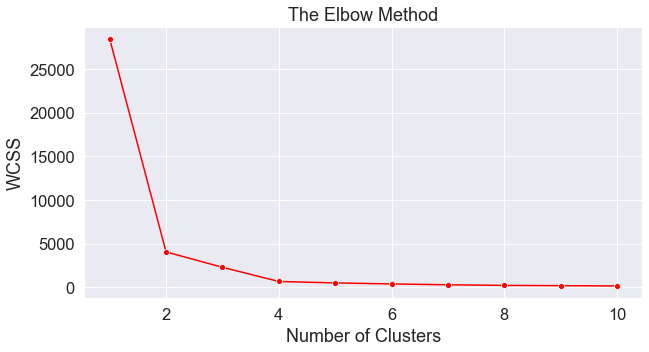

In [20]:
# Making a plot: which curve will b look like elbow: 
# that's why we called it 'The Elbow Method' 

plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss,marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### Insights:
    as we can see in the Elbow Method plot big breakdown is on the cluster point of 4.. after K(clusters)=4  Silhouettee score is going low.
    
what is the exact Silhouette Score for K(clusters) is! which we will see in the next code.

In [23]:
import sklearn.metrics as metrics

for i in range(3,13):
    labels=KMeans(n_clusters=i, init="k-means++", random_state=200).fit(X).labels_
    print("Silhouette score for k(clusters) = " + str(i) + " is "
         + str(metrics.silhouette_score(X,labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters) = 3 is 0.7115938755735483
Silhouette score for k(clusters) = 4 is 0.7297962787082786
Silhouette score for k(clusters) = 5 is 0.6854653509906578
Silhouette score for k(clusters) = 6 is 0.6608453926126956
Silhouette score for k(clusters) = 7 is 0.6133345311845234
Silhouette score for k(clusters) = 8 is 0.5744107436845631
Silhouette score for k(clusters) = 9 is 0.5567080239397021
Silhouette score for k(clusters) = 10 is 0.5346863782827478
Silhouette score for k(clusters) = 11 is 0.5447142936647413
Silhouette score for k(clusters) = 12 is 0.5588544854020416


as above clerification of code, we can see the result that Silhouetee score for k(clusters)=4 is 0.72979. and after that score is dropping down from the cluster 5 where Silhouette score is 0.6855.

In [25]:
# now, let's see cluster for the students: [# n_cluster]
# we can change "n_cluster" for the testing purpose:

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amita\anacond

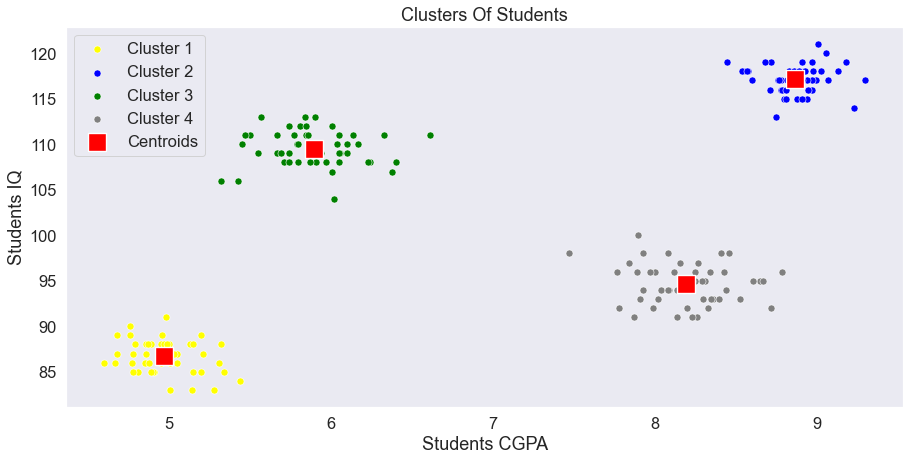

In [26]:
# checking the cluster's of students:
# using "Scatter pLot" 

plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0,0], X[y_kmeans == 0,1], color = "yellow", label = "Cluster 1", s=50)
sns.scatterplot(X[y_kmeans == 1,0], X[y_kmeans == 1,1], color = "blue", label = "Cluster 2", s=50)
sns.scatterplot(X[y_kmeans == 2,0], X[y_kmeans == 2,1], color = "green", label = "Cluster 3", s=50)
sns.scatterplot(X[y_kmeans == 3,0], X[y_kmeans == 3,1], color = "grey", label = "Cluster 4", s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red",
               label="Centroids", s=300, marker=",")
plt.grid(False)
plt.title('Clusters Of Students')
plt.xlabel('Students CGPA')
plt.ylabel('Students IQ')
plt.legend()
plt.show()


From the cluster created above it can be clearly inferred that the higher the students 'cgpa' the higher their 'iq' and become clusters based on that.

In [30]:
# here, we are going to make csv file which gives cgpa, iq, and cluster of all Students

data.to_csv("out.csv", index = False)

In [31]:
# let's check above data here:

data1 = pd.read_csv('out.csv')
data1

,cgpa,iq,cluster
0,5.13,88,0.0
1,5.90,113,2.0
2,8.36,93,3.0
3,8.27,97,3.0
4,5.45,110,2.0
...,...,...,...
188,4.68,89,NaN
189,8.57,118,NaN
190,5.85,112,NaN
191,6.23,108,NaN


In [32]:
# null values:

data1.isnull().sum()

cgpa       0
iq         0
cluster    7
dtype: int64

In [33]:
# drop 'nan' values from the dataset:

data1 = data1.dropna()

In [34]:
# checking dataset again without null values:

data1

,cgpa,iq,cluster
0,5.13,88,0.0
1,5.90,113,2.0
2,8.36,93,3.0
3,8.27,97,3.0
4,5.45,110,2.0
...,...,...,...
181,8.23,91,3.0
182,8.95,116,0.0
183,6.33,111,1.0
184,8.44,94,2.0
